# Recursive Feature Elimination

### Introduction

In the last lesson, we saw how by scaling our data we can place our features in the same units and then use this to assess feature importances. 

Now at this point we could simply determine a top number of variables to select, and then choose those that are the most important.  But how do we determine the number of features we should select?  What we often find is that we can achieve the similar levels of accurracy even when we drastically reduce the number of features.  If we can achieve this relatively high accuracy with a lower number of features, we should.

A lower number of features makes our models simpler to understand, less prone to variance, and also reduces the risk of multicollinearity.

### Welcome RFE

One way to determine how much our score is reduced by limiting the number of features is simply to try decreasing numbers of features, and see how much the score decreases with one fewer feature.  Now, how do we know which feature to eliminate at each level - well we try eliminating each potential features, and we remove the feature where our model performs the best.

In code, our procedure looks something like the following:

```python
top_score = 0
top_model = None
column_to_reduce = None
for column in X.columns:
    model = LinearModel()
    X_with_dropped = X.drop(columns = [column])
    model.fit(X_with_dropped)
    current_score = model.score(X_with_dropped, y)
    if current_score > top_score:
        top_model = model
        top_score = current_score
        column_to_reduce = column
```

So with above code will find the column to eliminate simply by trying to remove each feature and calculating the score.  We can do this with SKlearn with the following code.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

y = df.price
X = df.drop(columns = ['price'])

scaled_X = scale(X)
scaled_y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.33, random_state=32)

from sklearn.feature_selection import RFE

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype bool, uint8, int64, float64 were all converted to float64 by the scale function.

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:180: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



In [81]:
estimator = LinearRegression(n_jobs=-1)
rfe = RFE(estimator, 100)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

estimator.fit(X_train_rfe,y_train)
score = estimator.score(X_test_rfe,y_test)

So above we initialize the model or estimator on which we will be performing RFE.  Then we initialize `RFE` with the model, and the number of features to select.  Then, we call `fit_transform` to select the set of features that produce the highest score.  Once selected we fit a model with that number of selectors.  

### The number of features to select

Now to discover the number of features select, we simply perform the above procedure with decreasing numbers of features, and store the respective scores.  Then we can find the model that has a relatively few number of features, but still a relatively high score.  Let's see this in action.

In [122]:
from sklearn.feature_selection import RFE
selectors = []

for idx in list(range(10, 300, 10))[::-1]:
    estimator = LinearRegression(n_jobs=-1)
    rfe = RFE(estimator, idx, step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

We can then plot the number of features and the respective scores with the following code.

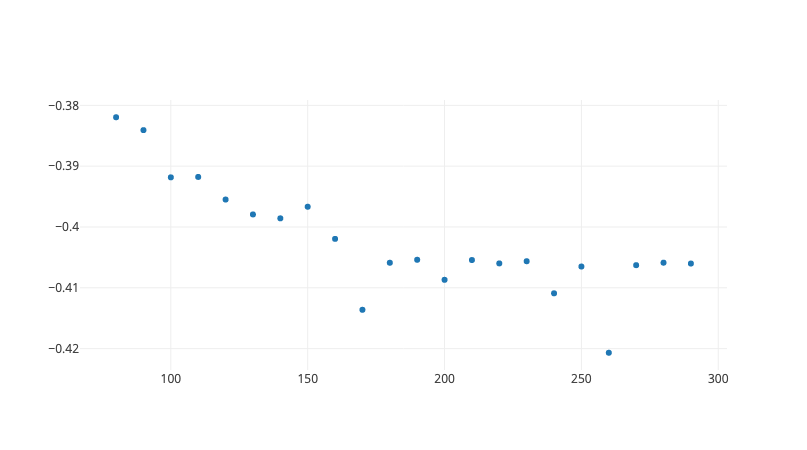

In [121]:
wrapped_selectors = np.array(selectors)
scores = wrapped_selectors[:, 1]
num_features = wrapped_selectors[:, -1]

from graph import plot, trace_values
trace = trace_values(num_features, scores)
plot([trace])

This is a fairly typical pattern in feature selection.  We can continue to reduce the number of variables without taking a significant hit to the accuracy.  The reason is because of multicollinearity.  Many of the variables we eliminate are correlated with other included variables, so we can safely remove them as other features are capturing similar effects.

In the above graph, we start to decreases in the accuracy when we include fewer than seventy two features.  Once we have that number, we can perform RFE again.

In [105]:
from sklearn.feature_selection import RFE
second_selectors = []

for idx in list(range(62, 72, 1))[::-1]:
    estimator = LinearRegression(n_jobs=-1)
    rfe = RFE(estimator, idx, step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    second_selectors.append(np.array([estimator, score, idx]))

In [106]:
wrapped_second_selectors = np.array(second_selectors)

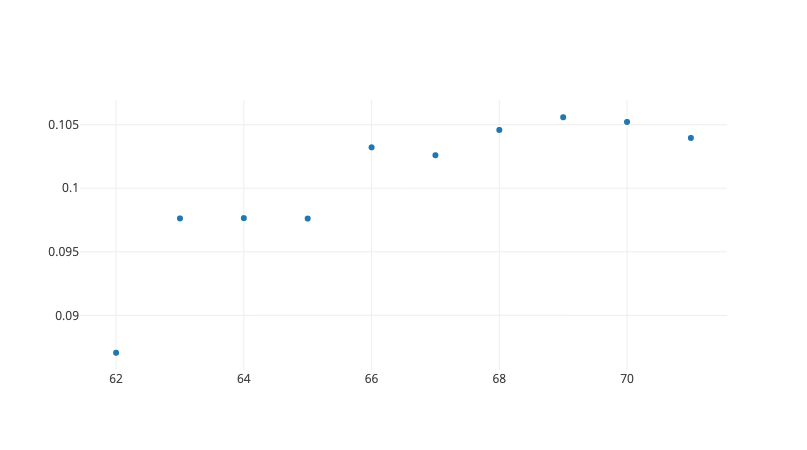

In [107]:
second_scores = wrapped_second_selectors[:, 1]
second_num_features = wrapped_second_selectors[:, -1]
from graph import plot, trace_values
second_trace = trace_values(second_num_features, second_scores)
plot([second_trace])

So there are a range of values we could choose, but 66 features looks like a good number.  Of course, we do not know which 66 features to choose so let's peform RFE one more time.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.33, random_state=12)

from sklearn.feature_selection import RFE

estimator = LinearRegression(n_jobs=-1)
rfe = RFE(estimator, 72)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

estimator.fit(X_train_rfe,y_train)
score = estimator.score(X_test_rfe,y_test)



In [115]:
score

-1.0528943001301674e+22

In [ ]:
df[rfe.support_]

### Resources

[RFE with SKlearn](http://dkopczyk.quantee.co.uk/feature-selection/)

In [101]:
scores = np.array([0.10097759841393361, 0.10191972493819035, 0.10135680176932282,
       0.10099887374310201, 0.0995283827854836, 0.10164602124821909,
       0.10185040361745068, 0.09909343221950562, 0.10103955590394964,
       0.1002106426076651, 0.10167720263657076, 0.1017794777284714,
       0.1015010556582191, 0.1016578124934443, 0.10307998244297856,
       0.10474940481461736, 0.09820434912163023, 0.08270090311692779,
       0.10391246857547032, 0.04210991520998042, 0.10472065120973895,
       0.10662682600263629, 0.10499978826086476, 0.08705492188124841,
       0.07290111484745121, -0.01979071540694166, -0.007982807497467936,
       -0.010600100154615655, -0.013441402860033369,
       -0.013926788917525634], dtype=object)
num_feats = np.array([292, 282, 272, 262, 252, 242, 232, 222, 212, 202, 192, 182, 172,
       162, 152, 142, 132, 122, 112, 102, 92, 82, 72, 62, 52, 42, 32, 22,
       12, 2], dtype=object)